In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train_tweet.csv')
test = pd.read_csv('C:\\Users\\guilh_000\\Documents\\tweetsclassify\\test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:


# checking out the positive comments from the train set

train[train['label'] == 0].head(10)



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
# checking out the negative comments from the train set 

train[train['label'] == 1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [8]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [9]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [10]:
train['normalized'] = train.tweet.apply(normalizer)



In [11]:
train.tail()

,id,label,tweet,normalized
31957,31958,0,ate @user isz that youuu?ðððððð...,[youuu]
31958,31959,0,to see nina turner on the airwaves trying to...,"[nina, turner, airwave, try, wrap, mantle, gen..."
31959,31960,0,listening to sad songs on a monday morning otw...,"[sad, song, monday, morning, otw, work, sad]"
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[condemns, act]"
31961,31962,0,thank you @user for you follow,[follow]


In [12]:
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [13]:
train.tail()

,id,label,tweet,normalized,normal
31957,31958,0,ate @user isz that youuu?ðððððð...,[youuu],youuu
31958,31959,0,to see nina turner on the airwaves trying to...,"[nina, turner, airwave, try, wrap, mantle, gen...",nina turner airwave try wrap mantle genuine he...
31959,31960,0,listening to sad songs on a monday morning otw...,"[sad, song, monday, morning, otw, work, sad]",sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[condemns, act]",condemns act
31961,31962,0,thank you @user for you follow,[follow],follow


In [14]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])
indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))


In [15]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.3,random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [16]:
from sklearn import svm
clf = svm.SVC(C= 1.0, kernel='linear')
clf.fit(data_train, targets_train)

SVC(kernel='linear')

In [17]:
clf.score(data_test, targets_test)

0.9506726457399103

In [ ]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

from sklearn.model_selection import GridSearchCV
hiperparameters = {'kernel': ('linear','rbf','poly'),'C':[1.5, 10, 100, 1000],'gamma': [1e-7, 1e-4, 1e-2, 0.1]}
grid = GridSearchCV(svm.SVC(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf.predict(data_train)
targets_pred = clf.predict(data_test)

confusion_matrix(targets_test, targets_pred)

array([[8840,  114],
       [ 359,  276]], dtype=int64)

In [19]:
tweet_to_predict = test['tweet'].head(500)
x = count_vectorizer.transform(tweet_to_predict)
j = 0 
for i in ((clf.predict(x))):
    if i == 1:   
        print(j)
    j += 1

1
8
16
19
21
29
31
33
42
55
68
71
75
81
93
94
97
110
121
122
137
140
141
149
150
163
164
176
178
183
184
185
186
193
199
200
208
210
214
229
237
245
249
254
255
261
266
267
269
271
276
277
278
292
304
308
309
312
321
342
345
351
352
355
356
363
364
365
367
371
377
382
384
389
391
393
396
401
406
409
418
419
422
425
426
430
434
437
438
447
456
472
477
487
493
495
498


In [24]:
test['tweet'][278]

"@user this '93 video - '16 when he referred to sen. warren as pocahontas = a stable pattern of  and ignorance.â\x80¦ "

In [25]:
from sklearn.metrics import classification_report
print(classification_report(targets_test, targets_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8954
           1       0.71      0.43      0.54       635

    accuracy                           0.95      9589
   macro avg       0.83      0.71      0.76      9589
weighted avg       0.94      0.95      0.95      9589



In [27]:
example = ["KKK is white supremacy scum"]
result = count_vectorizer.transform(example)
clf.predict(result)

array([1], dtype=int64)

In [31]:
#data manipulation

train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [32]:
#SMOTE #DIDN'T IMPROVE MODEL BY MUCH. NEGATIVE RECALL VALUES WERE BETTER BY 16 PERCENT WHILE EVERYTHING ELSE DROPPED DRAMATICALLY
from imblearn.over_sampling import SMOTE
#import numpy as np
sm = SMOTE(random_state=12)
data_train_res, targets_train_res = sm.fit_sample(data_train, targets_train)
print (targets_train.value_counts() , np.bincount(targets_train_res))

0    20766
1     1607
Name: label, dtype: int64 [20766 20766]


In [33]:
#build svm model again after over sampled data CHANGE CLF VARIABLE PLEASE

from sklearn import svm
clf = svm.SVC(C= 1.0, kernel='linear')
clf.fit(data_train_res, targets_train_res)

SVC(kernel='linear')

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf.predict(data_train_res)
targets_pred = clf.predict(data_test)

confusion_matrix(targets_test, targets_pred)

array([[6768, 2186],
       [ 276,  359]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(targets_test, targets_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8954
           1       0.14      0.57      0.23       635

    accuracy                           0.74      9589
   macro avg       0.55      0.66      0.54      9589
weighted avg       0.91      0.74      0.81      9589



In [60]:
#DATA VIS
isnegative = train[train.label == 1]
print(isnegative.shape)

(2242, 5)


In [64]:
allnegative = isnegative['normal']
allnegative.head()

13                        school build wall chant
14                                               
17                                          agree
23                                    prove lumpy
34    unbelievable st century need something like
Name: normal, dtype: object

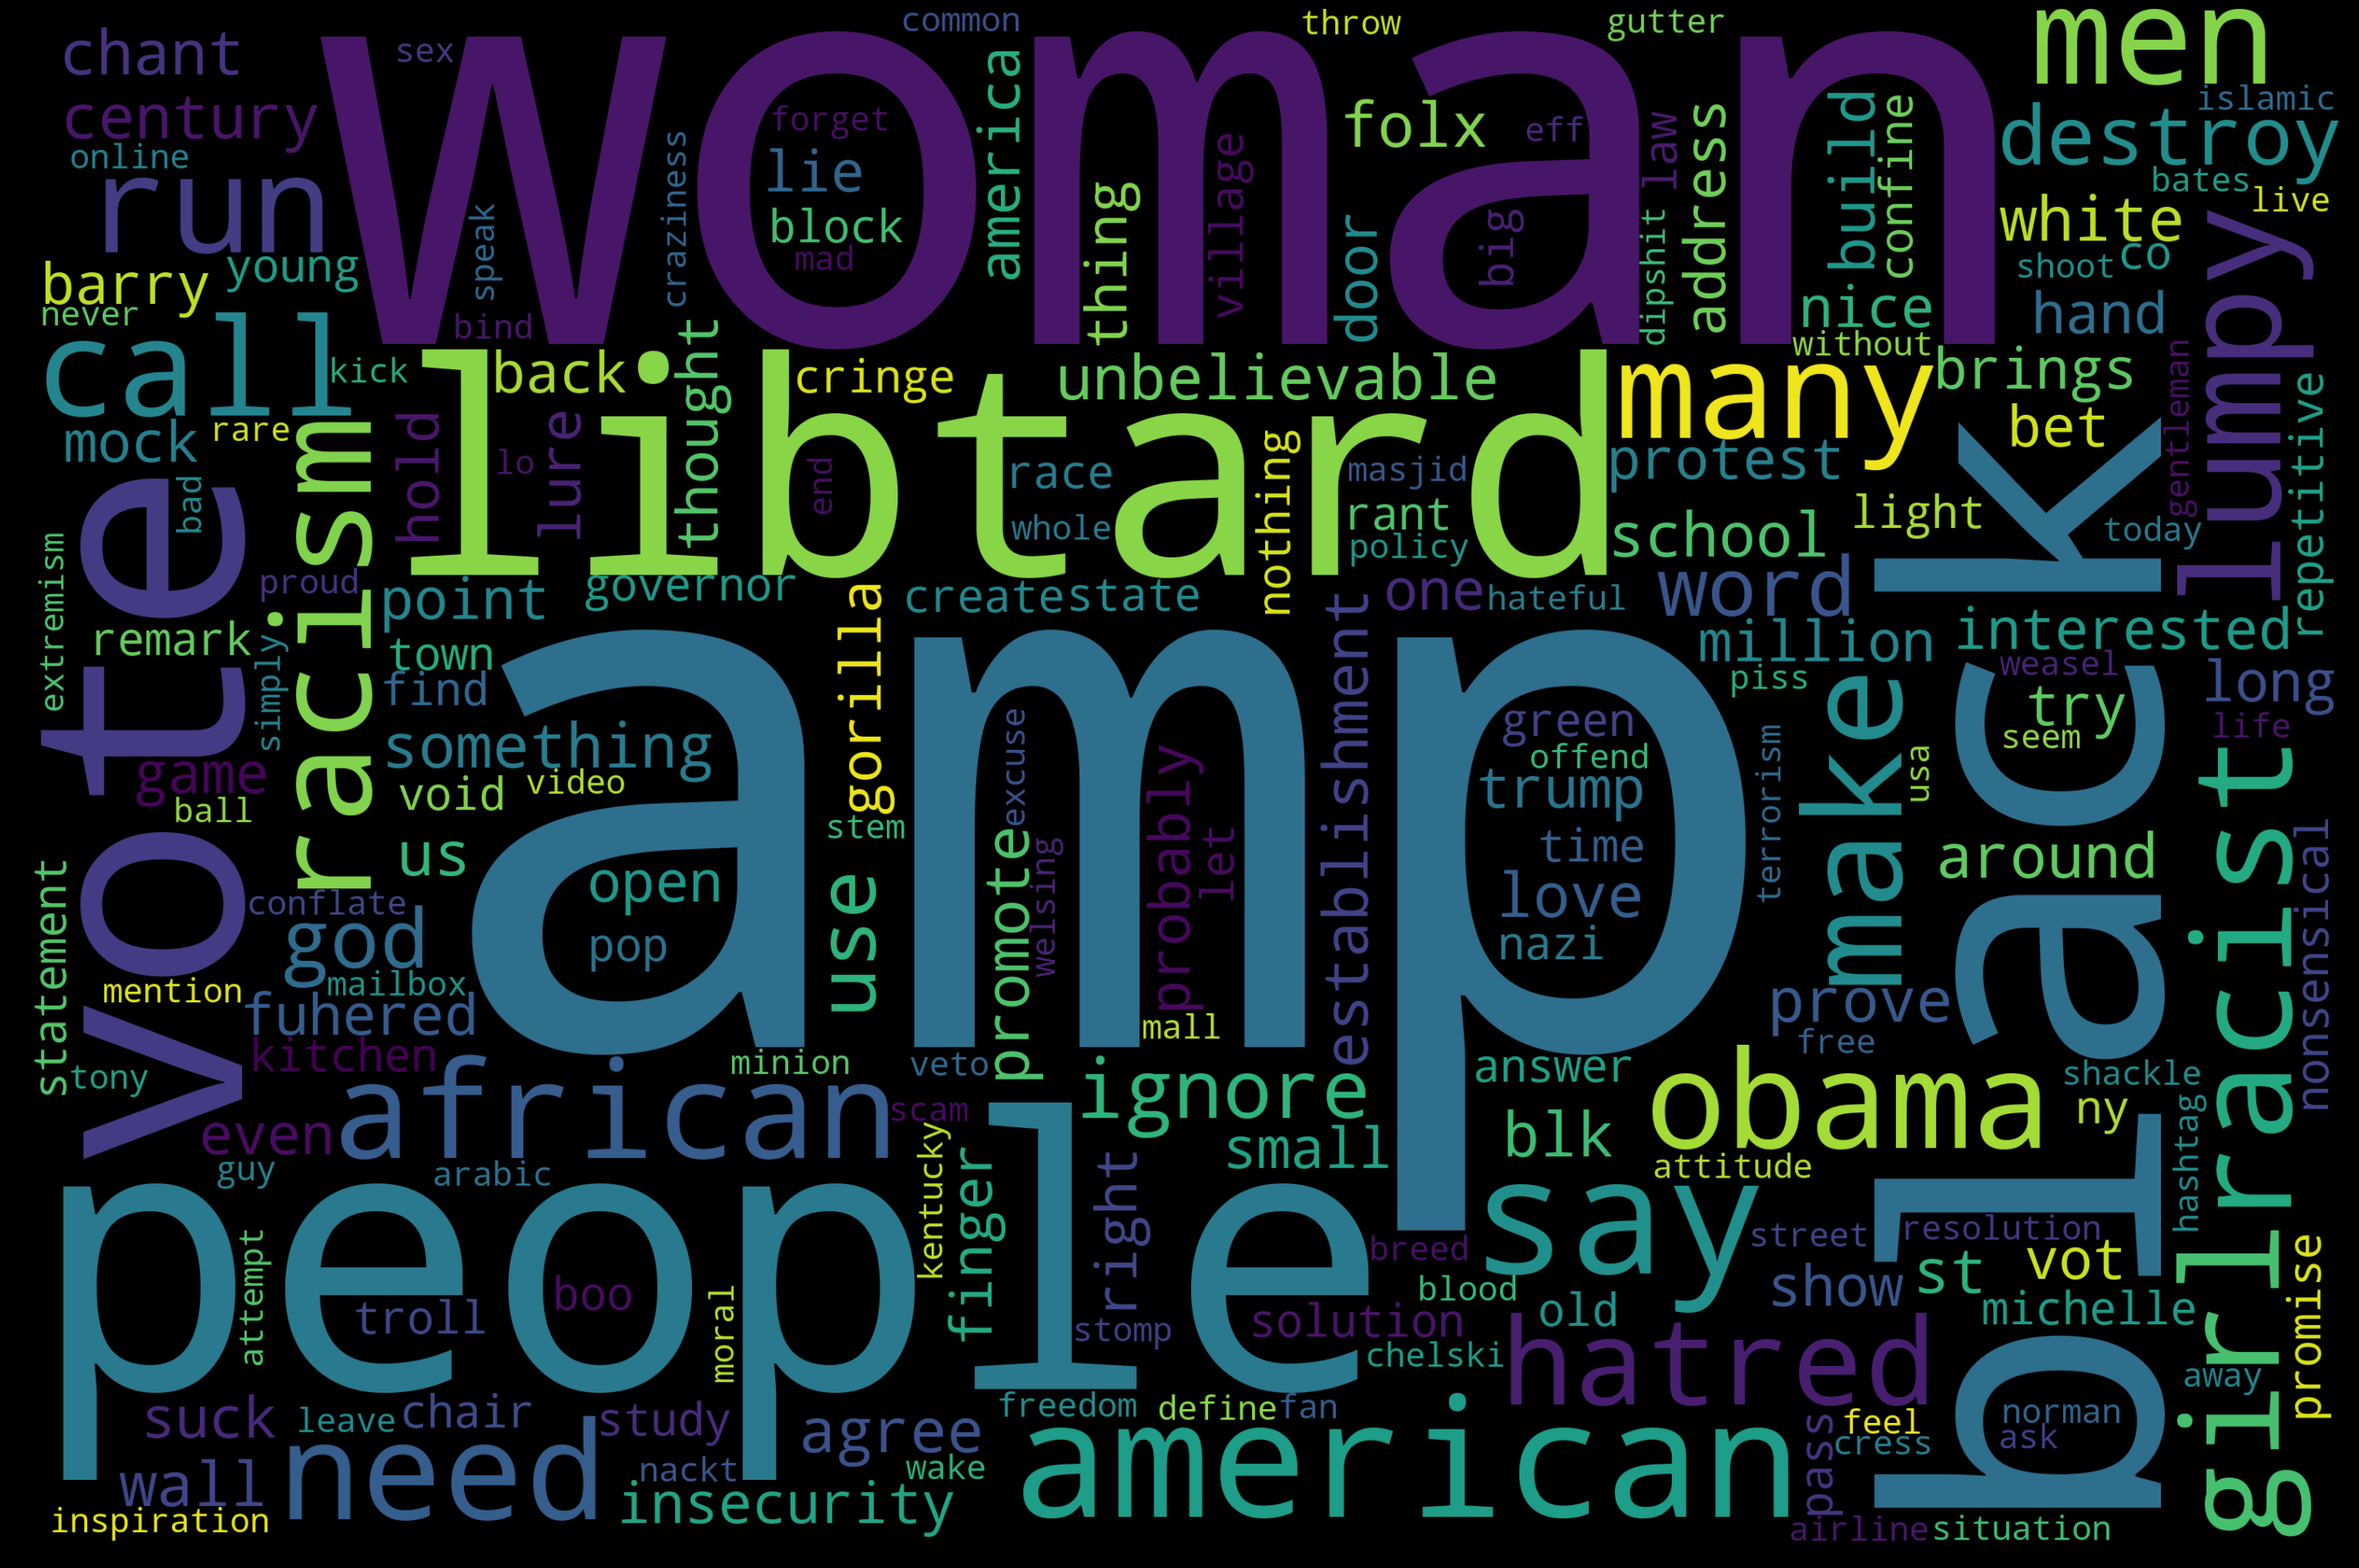

In [69]:
#build wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = isnegative.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()